### Feature Engineering with PCA

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA

/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
digits_data=datasets.load_digits()
n=len(digits_data.images)

In [3]:
image_data=digits_data.images.reshape((n,-1))
image_data.shape

(1797, 64)

In [5]:
labels=digits_data.target
labels

array([0, 1, 2, ..., 8, 9, 8])

### 如何選取Pricinple個數以達到降維的效果？

In [6]:
# n_components : 選可以解釋 total varaince 到0.8的pricinple個數
pca_transformer = PCA(n_components=0.8)
pca_images=pca_transformer.fit_transform(image_data)
pca_transformer.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863])

In [12]:
pca_transformer.explained_variance_ratio_.sum()

0.802895776104032

### Visualize Result

<IPython.core.display.Javascript object>


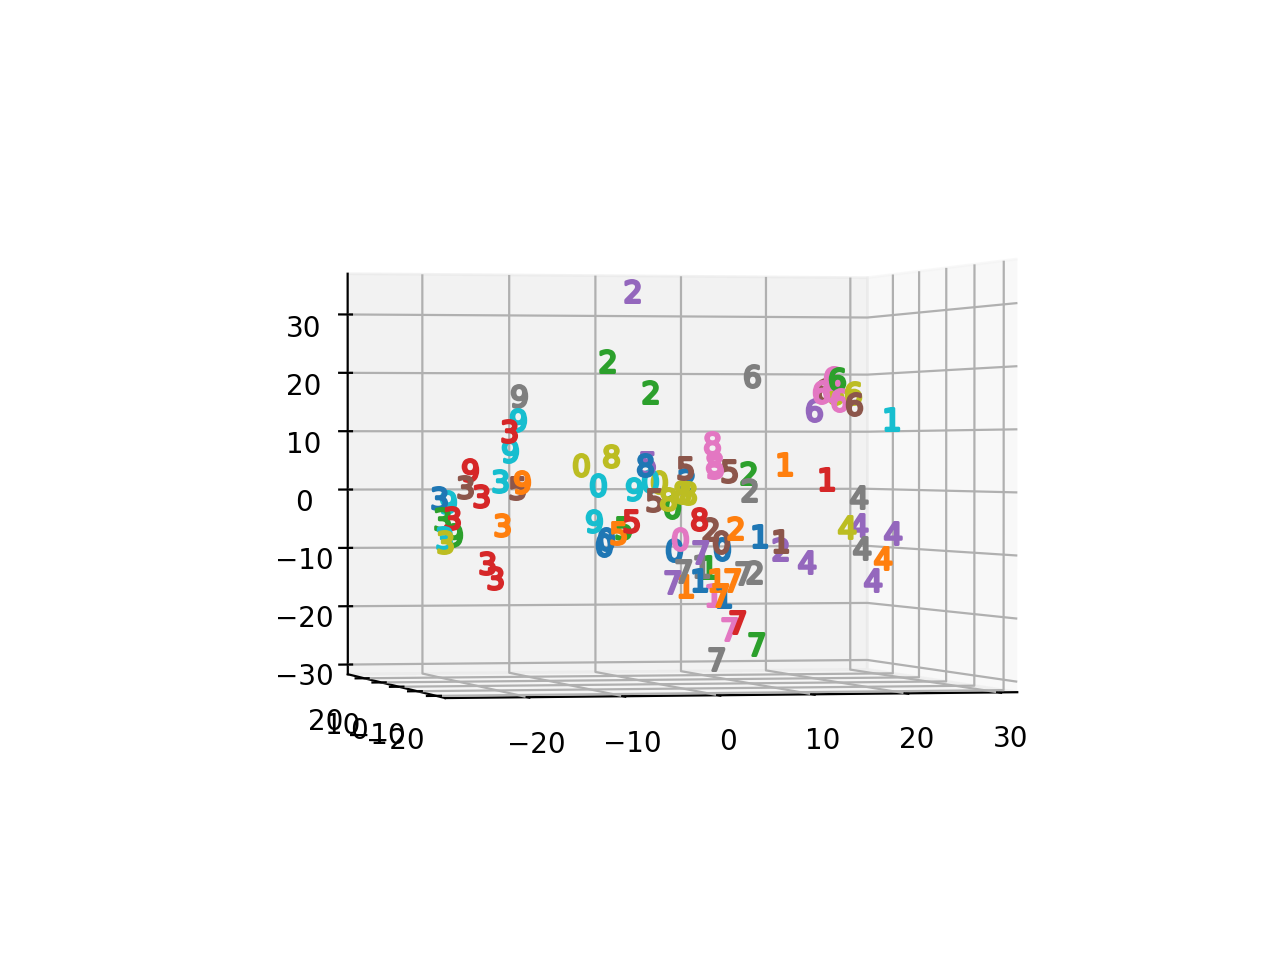

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
for i in range(100):
    ax.scatter(pca_images[i,0],pca_images[i,1],pca_images[i,2],marker=r'${}$'.format(labels[i]),s=64)

In [13]:
ax.set_xlabel("Principle component 1")
ax.set_ylabel("Principle component 2")
ax.set_zlabel("Principle component 3")

Text(-0.077569695497199, 0.0002489066993278333, 'Principle component 3')

### 實驗

In [68]:
import numpy as np 
import pylab as plt 
%pylab
num_samples = 10000


Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


/Users/jimmy/Desktop/myenv/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['exp2', 'plt', 'angle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [62]:
# experiment1 y=5x+epsilon

x=np.random.uniform(0,1,num_samples)
epsilon=np.random.normal(0,1,num_samples)
y=5*x+epsilon
exp1=np.stack((x,y),axis=1)
plt.scatter(exp1[:,0],exp1[:,1])

<IPython.core.display.Javascript object>


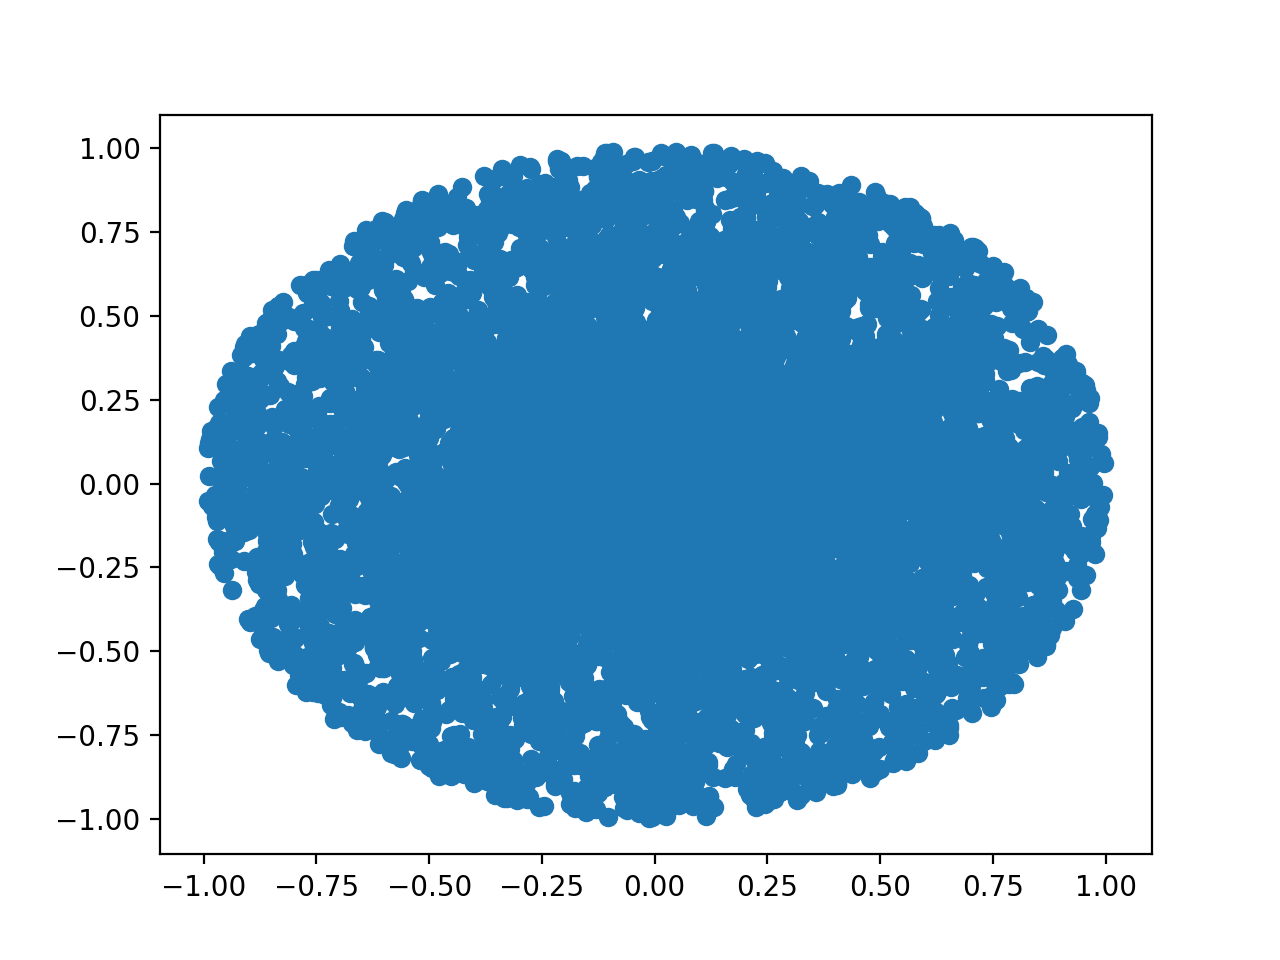

In [63]:
# experiment2 

angle=np.random.uniform(0,2*np.pi,num_samples)
r=np.random.uniform(0,1,num_samples)
x=r*np.cos(angle)
y=r*np.sin(angle)
exp2=np.stack((x,y),axis=1)
plt.scatter(exp2[:,0],exp2[:,1])

In [64]:
pca_transformer = PCA()
pca_images=pca_transformer.fit_transform(exp1)
pca_transformer.explained_variance_ratio_

array([0.99152454, 0.00847546])

In [65]:
pca_transformer = PCA()
pca_images=pca_transformer.fit_transform(exp2)
pca_transformer.explained_variance_ratio_

array([0.50935814, 0.49064186])

### Outlier Sensitive

- count data容易出現outlier，因此建議遇到count資料時可以先做log transform、或是拿掉outlier比較不會影響結果

<IPython.core.display.Javascript object>


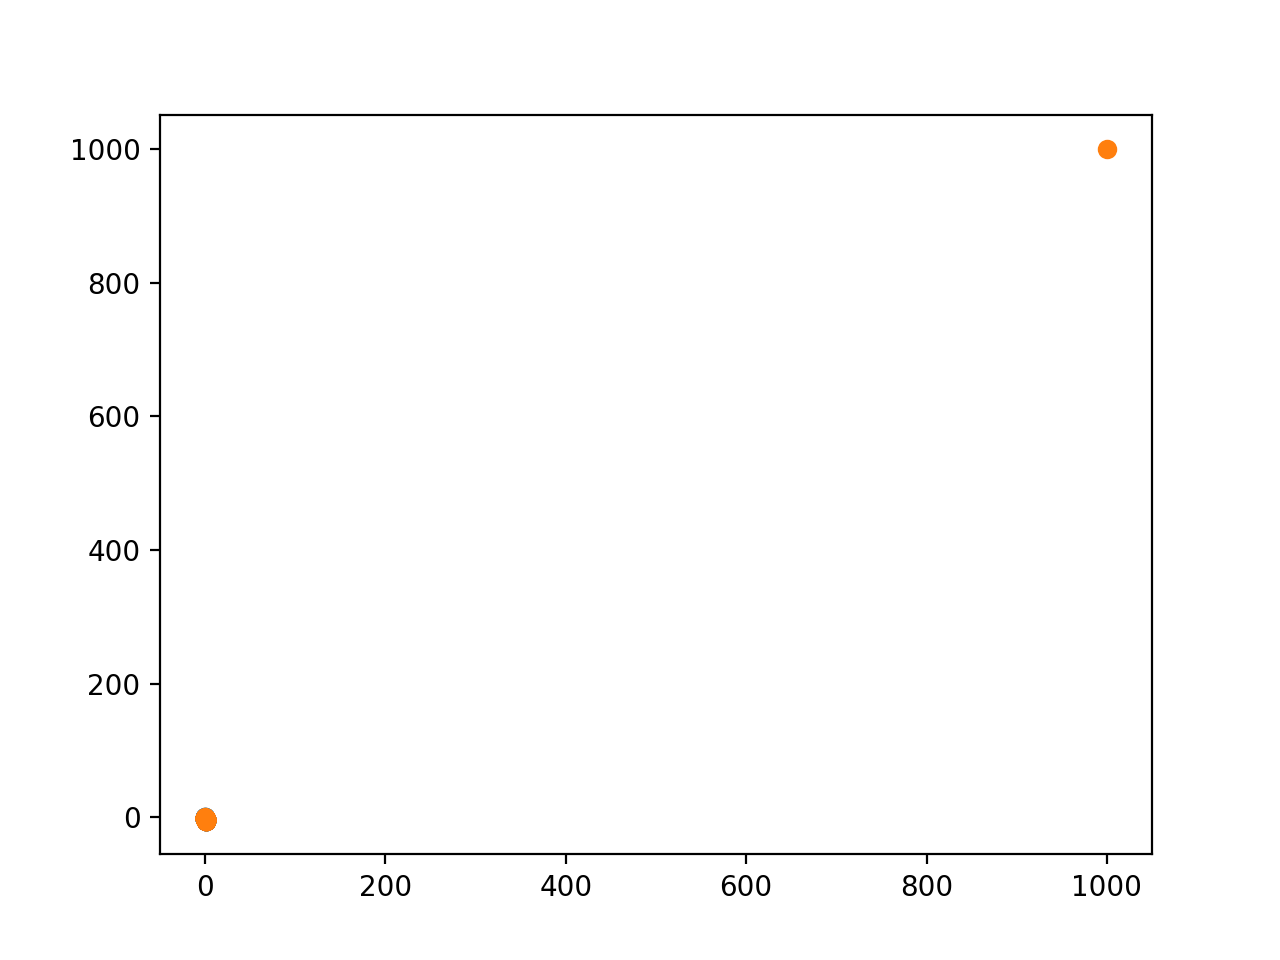

In [184]:
# experiment3 y=5x+epsilon with outlier
num_samples=100
x=np.random.uniform(0,1,num_samples)
epsilon=np.random.normal(0,0.02,num_samples)
y=-5*x+epsilon
exp3=np.stack((x,y),axis=1)
plt.scatter(exp3[:,0],exp3[:,1])


In [185]:
pca_transformer = PCA()
pca_images=pca_transformer.fit_transform(exp3)
pca_transformer.explained_variance_ratio_

array([9.99992359e-01, 7.64060347e-06])

In [186]:
pca_transformer.components_

array([[ 0.19618145, -0.98056761],
       [-0.98056761, -0.19618145]])

<IPython.core.display.Javascript object>


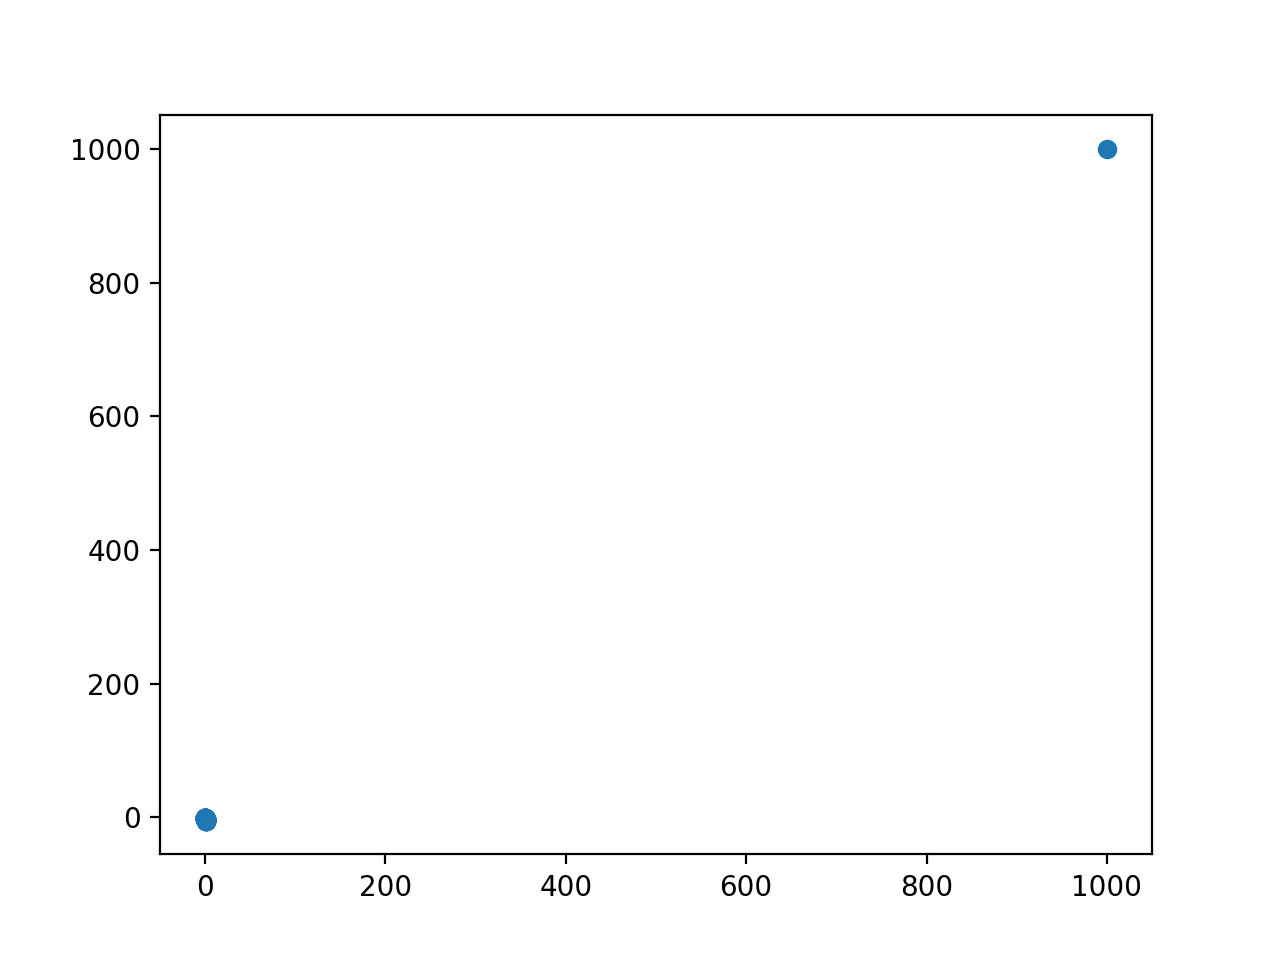

In [189]:
# experiment3 y=5x+epsilon with outlier
num_samples=100
x=np.random.uniform(0,1,num_samples)
epsilon=np.random.normal(0,0.02,num_samples)
y=-5*x+epsilon
exp3=np.stack((x,y),axis=1)
exp3=np.vstack((exp3,np.array([[1000,1000]]))) #add outlier
plt.scatter(exp3[:,0],exp3[:,1])


In [188]:
pca_transformer = PCA()
pca_images=pca_transformer.fit_transform(exp3)
pca_transformer.explained_variance_ratio_
pca_transformer.components_

array([[ 0.70602105,  0.70819085],
       [ 0.70819085, -0.70602105]])